In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree

# Projeto 

Opening file

In [3]:
file = pd.read_csv('data.csv')

In [4]:
file.shape

(2517, 7)

Calculating Rolling Mean with (10,150) windows

In [5]:
file['MASmall'] = file['Close'].rolling(window=10).mean()

In [6]:
file['MABig'] = file['Close'].rolling(window=150).mean()

In [9]:
file.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume,MASmall,MABig
2512,10/29/2018,2682.649902,2706.850098,2603.540039,2641.250000,2641.250000,4673700000,2731.386987,2776.283200
2513,10/30/2018,2640.679932,2685.429932,2635.340088,2682.629883,2682.629883,5106380000,2718.657983,2776.800732
2514,10/31/2018,2705.600098,2736.689941,2705.600098,2711.739990,2711.739990,5112420000,2708.910986,2777.273198
2515,11/1/2018,2717.580078,2741.669922,2708.850098,2740.370117,2740.370117,4708420000,2706.069995,2778.329800
2516,11/2/2018,2745.449951,2756.550049,2700.439941,2723.060059,2723.060059,4237930000,2701.597998,2779.053867


Price x Moving Average 10 x Moving Average 150

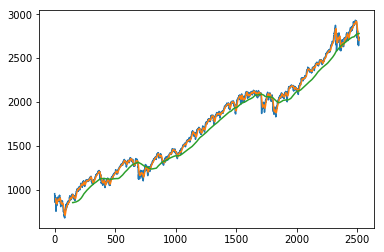

In [8]:
plt.plot(file['Close'])
plt.plot(file['MASmall'])
plt.plot(file['MABig'])

Calculating binary to show buy oportunities

In [10]:
file['Strat1'] = file['MABig'] > file['MASmall']

In [11]:
file['Strat1'] = file['Strat1'].astype(int)

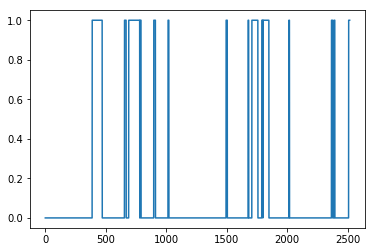

In [12]:
plt.plot(file['Strat1'])

In [13]:
file['Strat1'].value_counts()

0    2146
1     371
Name: Strat1, dtype: int64

### Backtest

In [14]:
historico = []
montante = 100
tem = 0
for i, n in enumerate(file['Strat1']):
    if n==1 and tem==0:
        compra = file['Close'][i]
        tem = 1
    elif n==0 and tem==1:
        venda = file['Close'][i]
        tem = 0
        montante = montante*(venda/compra)
    historico.append(montante)

In [15]:
montante

145.95918452465966

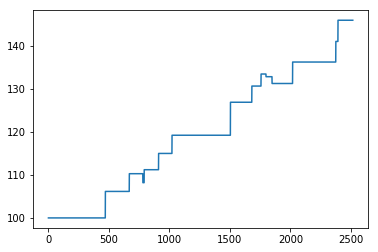

In [16]:
plt.plot(historico)

In [17]:
file['Close'][len(file)-1]/file['Close'][0]

2.8580454903482377

In [18]:
file.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume,MASmall,MABig,Strat1
2512,10/29/2018,2682.649902,2706.850098,2603.540039,2641.250000,2641.250000,4673700000,2731.386987,2776.283200,1
2513,10/30/2018,2640.679932,2685.429932,2635.340088,2682.629883,2682.629883,5106380000,2718.657983,2776.800732,1
2514,10/31/2018,2705.600098,2736.689941,2705.600098,2711.739990,2711.739990,5112420000,2708.910986,2777.273198,1
2515,11/1/2018,2717.580078,2741.669922,2708.850098,2740.370117,2740.370117,4708420000,2706.069995,2778.329800,1
2516,11/2/2018,2745.449951,2756.550049,2700.439941,2723.060059,2723.060059,4237930000,2701.597998,2779.053867,1


## Machine Learning

Creating Target: Variation of next 10 days

In [19]:
variacao = []
for i in range(len(file['Close'])-10):
    variacao.append(1 - file['Close'][i+10]/file['Close'][i])

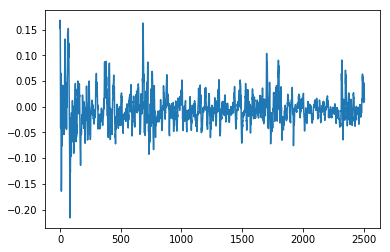

In [20]:
plt.plot(variacao)

In [21]:
file['target'] = pd.DataFrame(variacao)

In [22]:
matrix = file.as_matrix()

c:\users\isabel\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


m is the data matrix with everything exepet date and starting at line 149 (because of MA) and ending before last 10 lines (because of variation that predicts for the next 10 days)

In [38]:
m = np.array(matrix[149:len(matrix)-10,1:])

X is m without the variation column

In [39]:
X = m[:,:len(m[0])-1]

Y is only yhe variation column

In [40]:
Y = m[:,-1]

In [26]:
Y

array([0.02606653114013502, 0.028862511878996022, -0.0037998626317454764,
       ..., 0.03469657745528687, 0.010260805012473506,
       0.016157342538582253], dtype=object)

In [27]:
X

array([[939.0399779999999, 956.2299800000001, 939.0399779999999, ...,
        938.6670106000001, 851.3772664466665, 0],
       [943.4400019999999, 946.2999880000001, 935.659973, ...,
        941.3740113, 851.3335331266665, 0],
       [942.4500119999999, 942.4500119999999, 919.650024, ...,
        939.4590089000001, 851.4591328999998, 0],
       ...,
       [2811.669922, 2816.939941, 2781.810059, ..., 2820.305004900001,
        2774.2977327666645, 0],
       [2802.0, 2806.040039, 2755.179932, ..., 2807.0219971000015,
        2774.4095328933313, 0],
       [2775.659912, 2797.77002, 2760.27002, ..., 2795.2429932000014,
        2774.775266939998, 0]], dtype=object)

Splitting dataset into train and test

In [28]:
size = int(0.8*len(X))
X_train = X[:size]
Y_train = Y[:size]
X_test = X[size:]
Y_test = Y[size:]

Decision Tree Model

In [29]:
clf = tree.DecisionTreeRegressor()

In [30]:
X_train[0]

array([939.0399779999999, 956.2299800000001, 939.0399779999999,
       944.8900150000001, 944.8900150000001, 5500840000,
       938.6670106000001, 851.3772664466665, 0], dtype=object)

In [31]:
clf = clf.fit(X_train,Y_train)

In [32]:
predict = clf.predict(X_test)

Root Mean squared error

$$RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{(Predict_i - Ytest_i)^2}}$$

In [33]:
error = 0
for i, n in enumerate(predict):
    error += (n - Y_test[i])**2
error = error/len(predict)

In [34]:
import math

In [35]:
math.sqrt(error)

0.029936684367129214

In [36]:
Y_test.mean()

-0.004064246200909832

In [37]:
Y_test.std()

0.02012647302117172